In [38]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Carica i dati dei settori e del valore dell'oro
sectors_df = pd.read_csv('src/SECTORS.csv')
assets_df = pd.read_csv('src/ASSETS.csv')

# Seleziona solo i dati dal 2010 al 2022 per lavorare con un intervallo di tempo comune
df = sectors_df.merge(assets_df[['date', 'gold%']], on='date', how='inner').dropna()

# Definisce la funzione di calcolo del rendimento del portafoglio con i pesi dati
def portfolio_return(weights):
    return np.sum(df.mean() * weights) * 12

# Definisce la funzione di calcolo della varianza del portafoglio con i pesi dati
def portfolio_variance(weights):
    return np.dot(weights.T, np.dot(df.cov() * 12, weights))

# Definisce la funzione di calcolo del rapporto rendimento/varianza
def sharpe_ratio(weights):
    return portfolio_return(weights) / np.sqrt(portfolio_variance(weights))

# Definisce i vincoli sui pesi (somma dei pesi uguale a 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, {'type': 'ineq', 'fun': lambda x: x})

# Definisce il range dei pesi (da 0 a 1)
bounds = tuple((0, 1) for i in range(len(df.columns) - 1))

# Definisce i pesi iniziali (equally-weighted)
init_weights = [1 / (len(df.columns) - 1)] * (len(df.columns) - 1)

# Minimizza la funzione del rapporto rendimento/varianza per ottenere i pesi ottimali del portafoglio
result = minimize(sharpe_ratio, init_weights, method='SLSQP', bounds=bounds, constraints=constraints)

weights_best_return_risk = result.x




###---------------- SOTTO IL MIGLIOR RISCHIO -----------------###




# Definisce la funzione di obiettivo come la varianza del portafoglio
def minimize_variance(weights):
    return portfolio_variance(weights)

# Minimizza la funzione della varianza del portafoglio per ottenere i pesi ottimali del portafoglio
result = minimize(minimize_variance, init_weights, method='SLSQP', bounds=bounds, constraints=constraints)

weights_min_risk = result.x

pf_return = portfolio_return(weights_min_risk)
pf_risk = np.sqrt(portfolio_variance(weights_min_risk))
pf_sharpe_ratio = pf_return / pf_risk

# Stampa i pesi ottimali del portafoglio con rischio minimo

print('Ritorno del portafoglio: ' + str(pf_return))
print('Rischio del portafoglio: ' + str(pf_risk))
print('Sharpe Ratio del portafoglio: ' + str(pf_sharpe_ratio))

#print(weights_min_risk)



Ritorno del portafoglio: 7.389307751169972
Rischio del portafoglio: 10.025182228737958
Sharpe Ratio del portafoglio: 0.7370746568564063
[9.47418379e-02 2.32824583e-11 1.48081974e-12 7.47869133e-13
 5.50167714e-13 3.29865470e-13 7.05169942e-12 4.43825625e-01
 3.15122103e-14 1.37145133e-01 3.24287404e-01]


c:\Users\edon\Anaconda3\envs\STANDARD\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


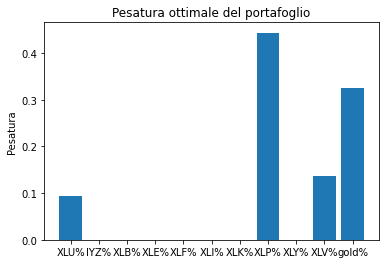

In [41]:
import matplotlib.pyplot as plt

# Crea una lista con i nomi degli assets
assets = list(df.columns[1:])

# Crea un grafico a barre con i pesi del portafoglio
plt.bar(assets, weights_min_risk)

# Aggiunge il titolo al grafico
plt.title('Pesatura ottimale del portafoglio')

# Aggiunge l'etichetta dell'asse y
plt.ylabel('Pesatura')

# Mostra il grafico
plt.show()
